In [110]:
import re 
import pandas as pd 
import numpy as np
from time import time  #
from collections import defaultdict

import spacy

import logging  
logging.basicConfig(format="%(levelname)s - %(asctime)s: %(message)s", datefmt= '%H:%M:%S', level=logging.INFO)

In [ ]:
df = pd.read_csv('simpsons_dataset.csv')
df.shape

In [10]:
df.isnull().sum()

raw_character_text    17814
spoken_words          26459
dtype: int64

## 전처리 (nltk)

In [12]:
#결측치 제거

df = df.dropna().reset_index(drop=True)
df.isnull().sum()

raw_character_text    0
spoken_words          0
dtype: int64

In [130]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

texts = df['spoken_words'].to_list()
stop_words = set(stopwords.words('english'))

tokens = [word_tokenize(txt.lower()) for txt in texts]
tokens_wo_stopword = [[word for word in token if not word in stop_words] for token in tokens]
tokens2 = [[word for word in token if len(word) >= 3] for token in tokens]

In [131]:
tokens2

[['actually',
  'was',
  'little',
  'both',
  'sometimes',
  'when',
  'disease',
  'all',
  'the',
  'magazines',
  'and',
  'all',
  'the',
  'news',
  'shows',
  'only',
  'natural',
  'that',
  'you',
  'think',
  'you',
  'have'],
 ['where', 'mr.', 'bergstrom'],
 ["n't",
  'know',
  'although',
  'sure',
  'like',
  'talk',
  'him',
  'did',
  "n't",
  'touch',
  'lesson',
  'plan',
  'what',
  'did',
  'teach',
  'you'],
 ['that', 'life', 'worth', 'living'],
 ['the',
  'polls',
  'will',
  'open',
  'from',
  'now',
  'until',
  'the',
  'end',
  'recess',
  'now',
  'just',
  'case',
  'any',
  'you',
  'have',
  'decided',
  'put',
  'any',
  'thought',
  'into',
  'this',
  "'ll",
  'have',
  'our',
  'final',
  'statements',
  'martin'],
 ["n't", 'think', 'there', 'anything', 'left', 'say'],
 ['bart'],
 ['victory', 'party', 'under', 'the', 'slide'],
 ['mr.', 'bergstrom', 'mr.', 'bergstrom'],
 ['hey',
  'hey',
  'moved',
  'out',
  'this',
  'morning',
  'must',
  'have',
  '

## Word2Vec

### 1. Gensim

In [43]:
import multiprocessing

from gensim.models import Word2Vec

In [44]:
cores = multiprocessing.cpu_count()

In [144]:
w2v_model = Word2Vec(tokens2,
                     min_count=20,
                     window=2,
                     iter=30,
                     size=300,
                     sample=6e-5, 
                     alpha=0.03, 
                     min_alpha=0.0007, 
                     negative=20,
                     workers=cores-1)

INFO - 16:30:15: collecting all words and their counts
INFO - 16:30:15: PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
INFO - 16:30:15: PROGRESS: at sentence #10000, processed 78027 words, keeping 9656 word types
INFO - 16:30:15: PROGRESS: at sentence #20000, processed 157197 words, keeping 14892 word types
INFO - 16:30:15: PROGRESS: at sentence #30000, processed 244162 words, keeping 19676 word types
INFO - 16:30:15: PROGRESS: at sentence #40000, processed 323938 words, keeping 22906 word types
INFO - 16:30:15: PROGRESS: at sentence #50000, processed 398261 words, keeping 25938 word types
INFO - 16:30:15: PROGRESS: at sentence #60000, processed 467221 words, keeping 28523 word types
INFO - 16:30:15: PROGRESS: at sentence #70000, processed 544386 words, keeping 31198 word types
INFO - 16:30:15: PROGRESS: at sentence #80000, processed 626023 words, keeping 33899 word types
INFO - 16:30:15: PROGRESS: at sentence #90000, processed 705380 words, keeping 36373 word types


INFO - 16:30:22: worker thread finished; awaiting finish of 3 more threads
INFO - 16:30:22: worker thread finished; awaiting finish of 2 more threads
INFO - 16:30:22: worker thread finished; awaiting finish of 1 more threads
INFO - 16:30:22: worker thread finished; awaiting finish of 0 more threads
INFO - 16:30:22: EPOCH - 10 : training on 1042477 raw words (338200 effective words) took 0.5s, 685942 effective words/s
INFO - 16:30:22: worker thread finished; awaiting finish of 6 more threads
INFO - 16:30:22: worker thread finished; awaiting finish of 5 more threads
INFO - 16:30:22: worker thread finished; awaiting finish of 4 more threads
INFO - 16:30:22: worker thread finished; awaiting finish of 3 more threads
INFO - 16:30:22: worker thread finished; awaiting finish of 2 more threads
INFO - 16:30:22: worker thread finished; awaiting finish of 1 more threads
INFO - 16:30:22: worker thread finished; awaiting finish of 0 more threads
INFO - 16:30:22: EPOCH - 11 : training on 1042477 raw 

INFO - 16:30:29: worker thread finished; awaiting finish of 5 more threads
INFO - 16:30:29: worker thread finished; awaiting finish of 4 more threads
INFO - 16:30:29: worker thread finished; awaiting finish of 3 more threads
INFO - 16:30:29: worker thread finished; awaiting finish of 2 more threads
INFO - 16:30:29: worker thread finished; awaiting finish of 1 more threads
INFO - 16:30:29: worker thread finished; awaiting finish of 0 more threads
INFO - 16:30:29: EPOCH - 23 : training on 1042477 raw words (339234 effective words) took 0.6s, 534515 effective words/s
INFO - 16:30:30: worker thread finished; awaiting finish of 6 more threads
INFO - 16:30:30: worker thread finished; awaiting finish of 5 more threads
INFO - 16:30:30: worker thread finished; awaiting finish of 4 more threads
INFO - 16:30:30: worker thread finished; awaiting finish of 3 more threads
INFO - 16:30:30: worker thread finished; awaiting finish of 2 more threads
INFO - 16:30:30: worker thread finished; awaiting fini

In [145]:
w2v_model.init_sims(replace=True)

INFO - 16:30:49: precomputing L2-norms of word weight vectors


In [146]:
w2v_model.wv.most_similar(positive=["homer"])

[('marge', 0.5770347118377686),
 ('abe', 0.493202805519104),
 ('bart', 0.48160886764526367),
 ('shhh', 0.46291613578796387),
 ('becky', 0.45497918128967285),
 ('mrs.', 0.4478793740272522),
 ('lisa', 0.4466487765312195),
 ('son', 0.4255007207393646),
 ('homie', 0.41602087020874023),
 ('supervisor', 0.4043712019920349)]

In [160]:
w2v_model.wv.most_similar(positive=["marge"])

[('homer', 0.5770347118377686),
 ('homie', 0.5023907423019409),
 ('honey', 0.48778659105300903),
 ('bart', 0.4737863540649414),
 ('abe', 0.4651995897293091),
 ('lisa', 0.46067774295806885),
 ('becky', 0.4455214738845825),
 ('sweetie', 0.4205964207649231),
 ('mom', 0.4116846024990082),
 ('uh-uh', 0.4116398096084595)]

In [168]:
w2v_model.wv.most_similar(positive=["donut"])

[('bite', 0.48480814695358276),
 ('awwww', 0.4754902124404907),
 ('raw', 0.4736859202384949),
 ('mmmm', 0.46578851342201233),
 ('thumb', 0.45657187700271606),
 ('tongue', 0.4548673629760742),
 ('spoon', 0.45448946952819824),
 ('kicks', 0.4478762149810791),
 ('ribs', 0.4422861337661743),
 ('leak', 0.4422408938407898)]

## 시각화

In [148]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [156]:
vocab = list(w2v_model.wv.vocab)
X = w2v_model[vocab]

print(len(X))
print(X[0][:10])
tsne = TSNE(n_components=2)

# 100개의 단어에 대해서만 시각화
X_tsne = tsne.fit_transform(X[:100, :])

<ipython-input-156-7155855b906e>:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  X = w2v_model[vocab]


3935
[-0.07469577 -0.06530521  0.06039632 -0.00831861  0.03304033 -0.03603432
 -0.09770429 -0.06206087  0.03720289  0.01486994]


In [158]:
df = pd.DataFrame(X_tsne, index=vocab[:100], columns=['x', 'y'])
df.shape

(100, 2)

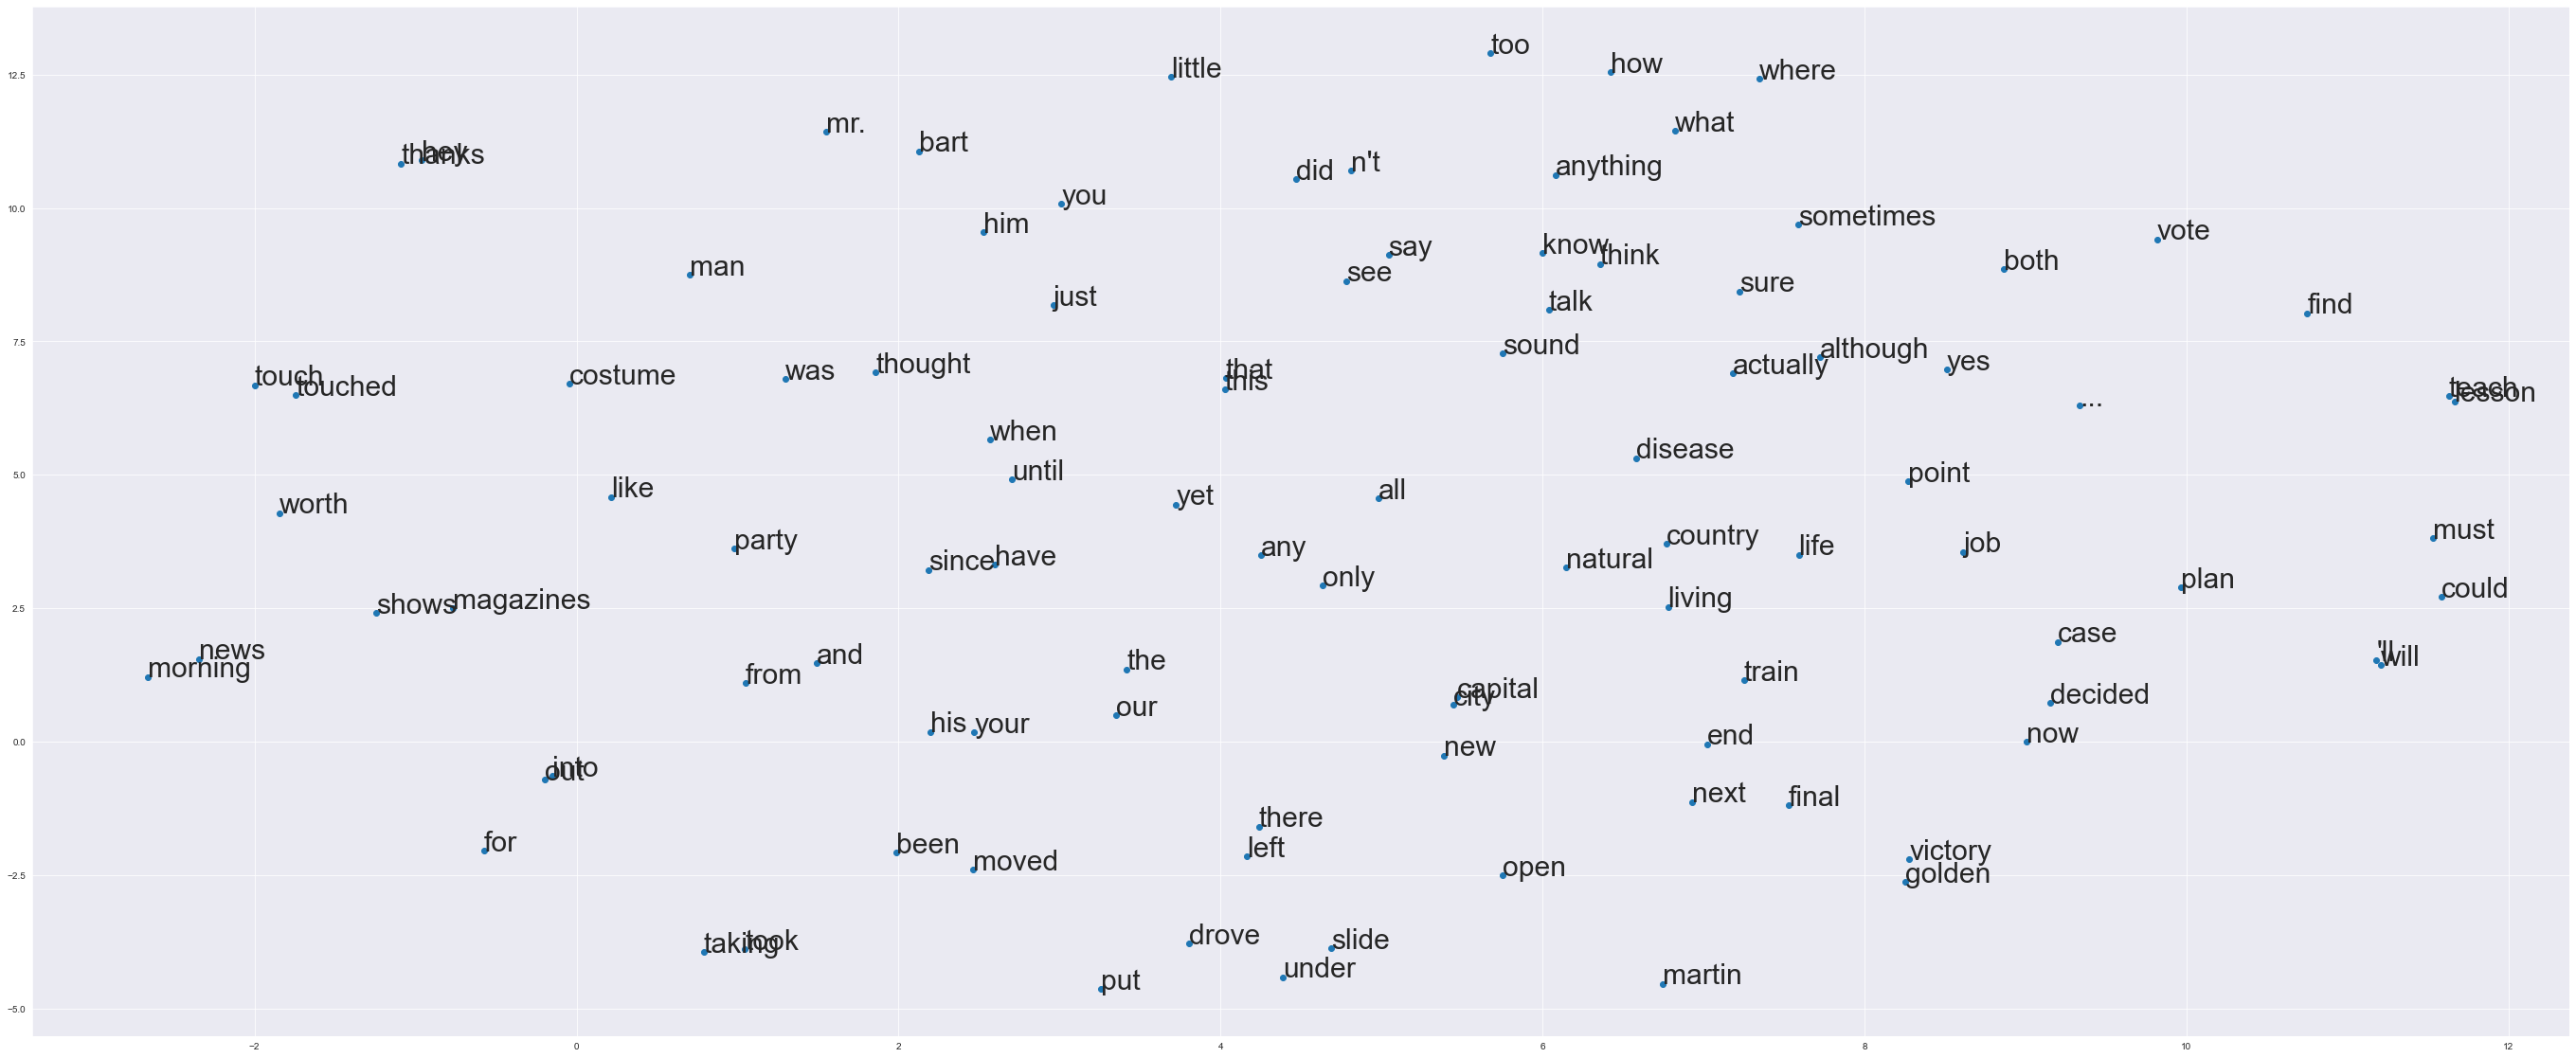

In [159]:
fig = plt.figure()
fig.set_size_inches(48, 20)
ax = fig.add_subplot(1, 1, 1)

ax.scatter(df['x'], df['y'])

for word, pos in df.iterrows():
    ax.annotate(word, pos, fontsize=30)
plt.show()

In [136]:
#================교재처럼 전처리 하려 했으나 실패=======================

from common.util import create_contexts_target
contexts, target = create_contexts_target(corpus[0], window_size=1)
for i in range(len(corpus)):
    a, b = create_contexts_target(corpus[i+1], window_size=1)
    contexts = np.concatenate((contexts,a))
    target = np.concatenate((target,b))

KeyboardInterrupt: 